Now that we've scraped the metadata of all of the Harry Potter fan fictions, it's time to explore!

# Import Data as DataFrame
We'll import as JSON and convert to a Pandas dataframe for easier manipulation/visualization.

In [1]:
import pandas as pd

data_directory = '../data/'

# here is the corrected data
filename = "corrected_data.json"

# take the transpose so that the column names are the metadata keys, not the story ids
df = pd.read_json(data_directory + filename).transpose()

# let's see what it looks like!
df.head()

,author_id,characters,genres,language,num_chapters,num_favs,num_follows,num_reviews,num_words,published,rated,status,title,updated
10000036,2846408,"[[Ron W., Hermione G.]]","[Romance, Humor]",English,1,5,2,3,5436,1389050085,T,Complete,Kilts and other adversities,1389050085
10000109,5232542,"[James P., Lily Evans P.]","[Humor, Romance]",English,1,4,NaN,2,747,1389051817,K+,Complete,Of Dead Puppies and Dropped Pianos,1389051817
10000111,5438139,[],[],Spanish,1,7,6,5,400,1389051884,K+,Incomplete,Querido primo Harry,1389051884
10000114,5437478,"[Hermione G., Draco M.]","[Romance, Humor]",Spanish,1,11,13,8,1757,1389051911,K+,Incomplete,Conciertos en Hogwarts,1389051911
10000137,4626918,"[Bellatrix L., Luna L.]","[Humor, Horror]",English,3,NaN,NaN,3,659,1389052244,T,Complete,Crazy songs from crazy people,1389414254


In [60]:
# for the purposes of development, let's only look at the first 1000 entries. run this cell for faster development
dev = df.head(n=1000).copy()

In [57]:
dev.to_csv(data_directory+"data.csv")

In [85]:
# run this cell for the real data
dev = df.copy()

In [90]:
sorted_dev = dev.sort_values(['published'], ascending = True)

In [91]:
characters_only = sorted_dev[sorted_dev['characters'].apply(lambda x: len(x)>0)]
len(characters_only)

507475

In [93]:
characters_only.to_csv(data_directory+"characters_only.csv")


In [108]:
def getCharacterDf(character):
    character = characters_only[characters_only['characters'].apply(lambda x: character in x)]
    return character

In [112]:
characters_only.head()

,author_id,characters,genres,language,num_chapters,num_favs,num_follows,num_reviews,num_words,published,rated,status,title,updated
684,4069,"[Lily Evans P., James P.]","[Romance, Angst]",English,1,83,12,363,10649,940489200,K+,Incomplete,Lily,940489200
3476,4069,"[Harry P., Lily Evans P.]","[Angst, Supernatural]",English,1,21,5,77,949,942739200,K,Incomplete,"Niaga, Erised",942739200
7795,6169,"[Harry P., Hermione G.]","[Fantasy, Adventure]",English,1,27,6,88,2140,945590400,K+,Complete,Harry Potter and the Last Battle,945590400
5111,6132,"[Ginny W., Ron W.]","[Romance, Mystery]",English,6,2,NaN,63,7819,946886400,K+,Incomplete,A 7th Year Christmas,995785200
8916,6432,"[Remus L., Sirius B.]",[],English,2,21,4,169,7936,947577600,K,Incomplete,Moony and Padfoot,983865600


In [89]:
dev.loc[dev.published == 0, 'published'] = 1177495284

In [53]:
dev.loc[dev.author_id == '509449']

,author_id,characters,genres,language,num_chapters,num_favs,num_follows,num_reviews,num_words,published,rated,status,title,updated
1657629,509449,[Harry P.],[Adventure],English,29,4491,3397,4699,470346,1177495284,T,Incomplete,Harry Potter and the Power of Time,1177495284
1841515,509449,"[Neville L., Harry P.]",[],English,4,6,5,44,1251,1083311314,K,Complete,"Drabbles: Random, Nonsense Writings",1089877848


In [113]:
all_characters = ['Ron W.', 'Ginny W.', 'Hermione G.', 'Sirius B.', 'Remus L.', 
                  'Draco M.', 'Severus S.', 'Albus D.', 'Fred W.', 'Voldemort', 'Lily Evans P.', 
                 'Albus S. P.']
for character in all_characters:
    character_df = getCharacterDf(character)
    addPublishedDate(character_df)
    grouped = character_df.groupby('published_date').published_date.count()
    print('{0} dates with fan fiction written about {1}'.format(len(grouped), character))
    grouped.to_csv(data_directory+character+'csv')
    


/Users/allisonking/anaconda2/envs/fanfic/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


5755 dates with fan fiction written about Ron W.
5743 dates with fan fiction written about Ginny W.
5930 dates with fan fiction written about Hermione G.
5781 dates with fan fiction written about Sirius B.
5690 dates with fan fiction written about Remus L.
5882 dates with fan fiction written about Draco M.
5784 dates with fan fiction written about Severus S.
4518 dates with fan fiction written about Albus D.
3480 dates with fan fiction written about Fred W.
4768 dates with fan fiction written about Voldemort
5789 dates with fan fiction written about Lily Evans P.
2797 dates with fan fiction written about Albus S. P.


In [110]:
character.to_csv(data_directory + "neville.csv")

In [106]:
grouped.columns = ['published_date', 'count']
grouped.head()

published_date
1999-11-16    1
1999-12-19    1
2000-02-02    1
2000-02-22    1
2000-02-26    1
Name: published_date, dtype: int64

Here's some useful time conversion functions

In [99]:
# should put this in a util class later
import datetime
def convertToDateString(timestamp):
    return datetime.datetime.utcfromtimestamp(int(timestamp)).strftime('%Y-%m-%d')

def convertToDateWithTimeString(timestamp):
    return datetime.datetime.utcfromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M:%S')

def convertToDateTimeObj(timestamp):
    return datetime.datetime.utcfromtimestamp(timestamp)


Now we can get the date in a more readable format. 

In [30]:
def addPublishedDate(dataframe):
    dataframe['published_date'] = dataframe['published'].map(lambda x: convertToDateTimeObj(x).date())
    return dataframe

addPublishedDate(dev)
dev.head()

,author_id,characters,genres,language,num_chapters,num_favs,num_follows,num_reviews,num_words,published,rated,status,title,updated,published_date
10000036,2846408,"[[Ron W., Hermione G.]]","[Romance, Humor]",English,1,5,2,3,5436,1389050085,T,Complete,Kilts and other adversities,1389050085,2014-01-06
10000109,5232542,"[James P., Lily Evans P.]","[Humor, Romance]",English,1,4,NaN,2,747,1389051817,K+,Complete,Of Dead Puppies and Dropped Pianos,1389051817,2014-01-06
10000111,5438139,[],[],Spanish,1,7,6,5,400,1389051884,K+,Incomplete,Querido primo Harry,1389051884,2014-01-06
10000114,5437478,"[Hermione G., Draco M.]","[Romance, Humor]",Spanish,1,11,13,8,1757,1389051911,K+,Incomplete,Conciertos en Hogwarts,1389051911,2014-01-06
10000137,4626918,"[Bellatrix L., Luna L.]","[Humor, Horror]",English,3,NaN,NaN,3,659,1389052244,T,Complete,Crazy songs from crazy people,1389414254,2014-01-06


In [31]:
grouped = dev.groupby('published_date').published_date.count()
grouped.head()

published_date
2000-10-28    10
2002-10-05     3
2002-10-06    80
2002-10-07    23
2014-01-06     7
Name: published_date, dtype: int64

Well that's weird- there shouldn't be any fan fiction from 1970. Seems like probably an error in fanfiction.net's database, so let's get rid of it. 1970 of course is when UTC starts, so that's 0...

In [22]:
mistake = convertToDateTimeObj(0).date()

grouped = grouped.drop(mistake)

Let's save this off as a CSV so we can play with in with D3 later

In [26]:
output_file = "grouped_dates.csv"
grouped.to_csv(data_directory + output_file)

In [27]:
grouped.head()

published_date
1999-09-04    1
1999-09-27    1
1999-10-13    1
1999-10-21    1
1999-10-30    1
Name: published_date, dtype: int64

## Some visualization
And now for the plotting!

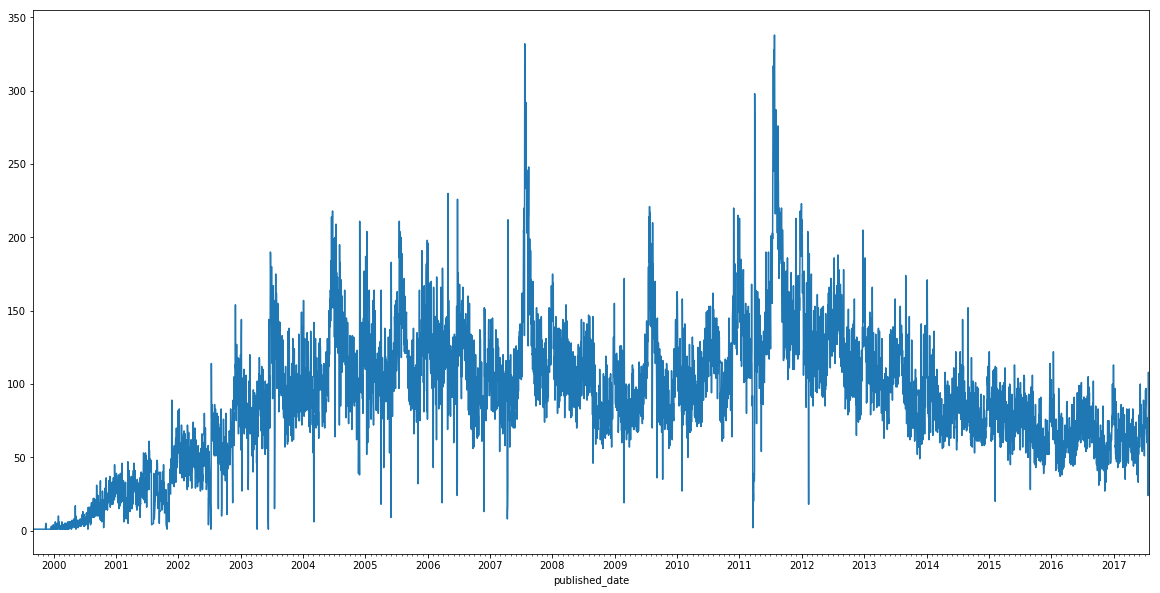

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (20,10)

# took the x axis tick labeling from https://matplotlib.org/devdocs/gallery/api/date.html
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# plot!
ax = grouped.plot()

# format
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
#ax.set_xlim(min_year, max_year)

fig = plt.figure()
fig.autofmt_xdate()

Man, I bet I know what that first spike is. 2007, middle of it, hand me down clothes and a redhead? Must be the day Harry Potter and the Deathly Hallows came out. And that second spike? Middle of 2011- that's gotta be when the last movie came out. 

In [24]:
%matplotlib inline

last_book = datetime.datetime.strptime("2007-07-21","%Y-%m-%d")
last_movie = datetime.datetime.strptime("2011-07-11", "%Y-%m-%d")

ax.axvline(x=last_book, color='r')
ax.axvline(x=last_movie, color='r')

fig

Not sure why that cell doesn't display the figure inline... Or why the settings aren't getting carried over. Should look into that later. For now let's just redraw the plot and add in the labels for when the last book and the last movie came out.

In [106]:
min_year = datetime.datetime.strptime("2007-01-01", '%Y-%m-%d')
max_year = datetime.datetime.strptime("2007-12-31", '%Y-%m-%d')

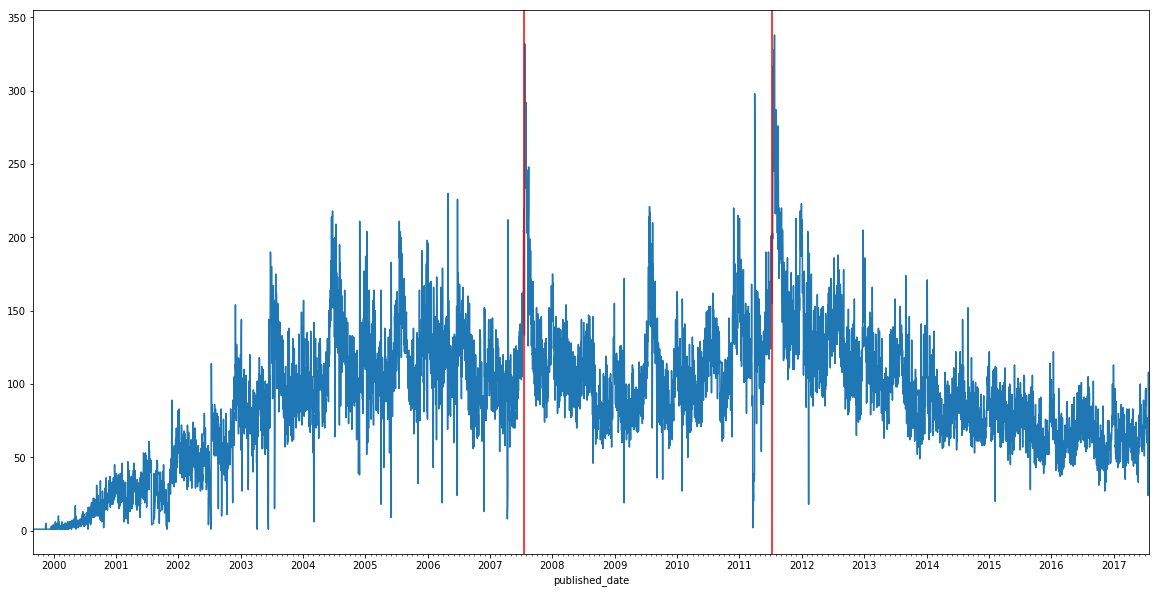

In [25]:
plt.rcParams['figure.figsize'] = (20,10)

# took the x axis tick labeling from https://matplotlib.org/devdocs/gallery/api/date.html
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# plot!
ax = grouped.plot()

# format
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# add some markers
ax.axvline(x=last_book, color='r')
ax.axvline(x=last_movie, color='r')


fig = plt.figure()
fig.autofmt_xdate()

Spot on! 10 points to me!